# MATH578 Homework 1
**Juan Carlos Apitz**

**ID 012523821**

In [1]:
import numpy
from numpy.linalg import norm
from pandas import DataFrame
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

## Problem 1

### Part a)

***Create matrix $A$:***

In [2]:
A = numpy.array([[2.,1.,0.],
               [1.,2.,1.],
               [0.,1.,2.]])


***Define a function to calculate the Modified Gram_Schmidt (algorithm 8.1 [NLA Trefethen & Bau])***

In [3]:
# Modified Gram-Schmidt (MGS)

def mgs(A, show = 0):
    m, n = A.shape
    Q = numpy.zeros((m,n))
    R = numpy.zeros((n,n))
    V = A.copy()
    for i in xrange(n):
        R[i,i] = norm(V[:,i])
        Q[:,i] = V[:,i]/R[i,i]
        for j in xrange(i+1,n):
            R[i,j] = numpy.dot(Q[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j] * Q[:,i]
    if show == 1:
        print 'Q = \n{}'.format(Q)
        print '\nR = \n{}'.format(R)
    return {"Q":Q,"R":R}

***Calculate the QR factorization of A***

In [4]:
qra = mgs(A, show = 1)

Q = 
[[ 0.89442719 -0.35856858  0.26726124]
 [ 0.4472136   0.71713717 -0.53452248]
 [ 0.          0.5976143   0.80178373]]

R = 
[[ 2.23606798  1.78885438  0.4472136 ]
 [ 0.          1.67332005  1.91236577]
 [ 0.          0.          1.06904497]]


### Part b)

***Define a function to calculate the Householder Reduced QR factorization for A***

***From class we have the Householder full QR***

In [5]:
# this is the full QR version
def full_house(A, show = 0):
    m, n = A.shape
    R = A.copy()
    V = numpy.zeros((m,n))
    Q = numpy.identity(m)
    for k in xrange(n):
        x = R[k:,k]
        v = x.copy()
        v[0] = v[0] + numpy.sign(x[0]) * norm(x)
        v = v/norm(v)
        R[k:,k:] = R[k:,k:] - 2 * numpy.outer(v, (numpy.dot(v, R[k:,k:])))
        V[k:,k] = v
    for k in xrange(n-1,-1,-1):
        v = V[k:,k]
        Q[k:,k:] = Q[k:,k:] - 2 * numpy.outer(v, (numpy.dot(v, Q[k:,k:])))
    if show == 1:
        print 'Q = \n{}'.format(Q)
        print '\nR = \n{}'.format(R)
    return {"Q":Q,"R":R}

***which produces the following factorization:***

In [6]:
qrhf = full_house(A, show = 1)

Q = 
[[-0.89442719  0.35856858 -0.26726124]
 [-0.4472136  -0.71713717  0.53452248]
 [ 0.         -0.5976143  -0.80178373]]

R = 
[[-2.23606798 -1.78885438 -0.4472136 ]
 [ 0.         -1.67332005 -1.91236577]
 [ 0.          0.         -1.06904497]]


***Here $Q$ is $3\times 3$ and $R$ is $3 \times 3$.***

***We can modify the above algorithm to produce the reduced version of the Householder QR factorization (also used in Problem 3):***

In [7]:
# this is the Thin QR version
def thin_house(A, show = 0, show_spill = 0):
    m, n = A.shape
    R = A.copy()
    V = numpy.zeros((m,n))
    Q = numpy.concatenate((numpy.identity(n),numpy.zeros((m - n, n))))
    for k in xrange(n):
        x = R[k:,k]
        v = x.copy()
        v[0] = v[0] + numpy.sign(x[0]) * norm(x)
        v = v/norm(v)
        R[k:,k:] = R[k:,k:] - 2 * numpy.outer(v, (numpy.dot(v, R[k:,k:])))
        if show_spill == 1:
            print 'matrix block {}:'.format(R[k+1:,k+1:].shape),'\n'
            print DataFrame(data=R[k+1:,k+1:]),'\n'
        V[k:,k] = v
    R = R[:n,:]
    for k in xrange(n-1,-1,-1):
        v = V[k:,k]
        Q[k:,k:] = Q[k:,k:] - 2 * numpy.outer(v, (numpy.dot(v, Q[k:,k:])))
    if show == 1:
        print 'Q = \n{}'.format(Q)
        print '\nR = \n{}'.format(R)
    return {"Q":Q,"R":R}

In [8]:
qrht = thin_house(A, show =1)

Q = 
[[-0.89442719  0.35856858 -0.26726124]
 [-0.4472136  -0.71713717  0.53452248]
 [ 0.         -0.5976143  -0.80178373]]

R = 
[[-2.23606798 -1.78885438 -0.4472136 ]
 [ 0.         -1.67332005 -1.91236577]
 [ 0.          0.         -1.06904497]]


***Here $Q$ is $3\times 3$ and $R$ is $3 \times 3$ also.***

***To illustrate the case when $m > n$ we can modify $A$:***

In [9]:
A = numpy.array([[2.,1.,0.],
               [1.,2.,1.],
               [0.,1.,2.],
               [1.,0.,1.]])

In [10]:
qrht = thin_house(A, show = 1)

Q = 
[[-0.81649658  0.18257419  0.2236068 ]
 [-0.40824829 -0.73029674  0.2236068 ]
 [ 0.         -0.54772256 -0.67082039]
 [-0.40824829  0.36514837 -0.67082039]]

R = 
[[ -2.44948974e+00  -1.63299316e+00  -8.16496581e-01]
 [  1.11022302e-16  -1.82574186e+00  -1.46059349e+00]
 [  0.00000000e+00   2.22044605e-16  -1.78885438e+00]]


***Here $Q$ is $4\times 3$ and $R$ is $3 \times 3$, which the output of the Thin-QR.***

***And we can recover $A = QR$***

In [11]:
numpy.dot(qrht['Q'],qrht['R'])

array([[  2.00000000e+00,   1.00000000e+00,  -3.33066907e-16],
       [  1.00000000e+00,   2.00000000e+00,   1.00000000e+00],
       [ -6.08094194e-17,   1.00000000e+00,   2.00000000e+00],
       [  1.00000000e+00,  -1.48952049e-16,   1.00000000e+00]])

### Part c)

***Create a function that generates Lotkin Matrices for $n = 2,3,4,...$***

In [12]:
def lotkin(n):
    L = numpy.zeros((n,n))
    L[0,:] = 1
    for i in xrange(1,n):
        for j in xrange(n):
            L[i,j] = 1/(i+j+1)
    return L

***Define the error metric function: $\|Q^TQ - I\|_F$***

In [13]:
def err(Q):
    qtq = numpy.dot(Q.T,Q)
    return norm(qtq - numpy.identity(qtq.shape[0]), ord= 'fro')

***Generate the Lotkin matrices and calculate the error metric for the MGS method and the Householder method for comparison:***

In [14]:
emgsr = []
ehouse = []

for n in xrange(2,13):
    L = lotkin(n)
    mgsqr = mgs(L)
    houseqr = thin_house(L)
    Qm = mgsqr['Q']
    Qh = houseqr['Q']
    emgsr.append(err(Qm))
    ehouse.append(err(Qh))
    
err_dict = {'mgs_error':emgsr, 'house_error':ehouse}

error_comp = DataFrame.from_dict(err_dict)

***Side by side error comparison:***

The comparison shows that the Householder factorization is more stable, incurring deviations of $Q$ from an orthogonal matrix that remains stable near zero, with order of magnitude of around $10^{-15}$. The MGS method, on the other hand, incurs deviations in $Q$ that increase in magnitude from order $10^{-15}$ to $10^{-1}$, as the dimension $n$ increases .

In [15]:
error_comp

,house_error,mgs_error
0,2.603704e-16,2.134113e-15
1,6.980403e-16,1.090199e-14
2,9.807188e-16,3.416413e-13
3,1.104571e-15,9.820108e-11
4,1.259796e-15,7.496646e-10
5,1.728039e-15,1.176913e-08
6,2.470600e-15,1.139656e-07
7,1.953329e-15,1.942440e-05
8,1.845191e-15,1.555496e-03
9,2.291950e-15,3.767891e-02


### Part d)

***Condition Number: create a function to compute $\log\kappa_F\left(A\right)$.***

In [16]:
def lcn(A):
    kf = numpy.log(norm(A, ord='fro') * norm(numpy.linalg.inv(A), ord='fro'))
    return kf

***Compute $\log\kappa_F\left(L_n\right)$ for the Lotkin matrices $L_n$, $n = 2,3,...,12$ and validate the results:***

In [17]:
lkf_vals = numpy.array([])
for n in xrange(2,13):
    L = lotkin(n)
    lkf = lcn(L)
    lkf_vals = numpy.append(lkf_vals,lkf)
    print 'log kf(L{}) {}'.format(n,lkf)

log kf(L2) 2.65089178726
log kf(L3) 6.18487043876
log kf(L4) 9.7494507469
log kf(L5) 13.2988097667
log kf(L6) 16.8386780397
log kf(L7) 20.3732044643
log kf(L8) 23.9045889889
log kf(L9) 27.4340284785
log kf(L10) 30.9623176723
log kf(L11) 34.4930154898
log kf(L12) 38.0359737665


***Calculate $\log e_n$ for both, the MGS and the Householder algorithms:***

In [18]:
mgsy = numpy.log(err_dict['mgs_error'])

housey = numpy.log(err_dict['house_error'])

***Plot $\log \kappa_F\left(L_n\right)$ vs $\log e_n$:***

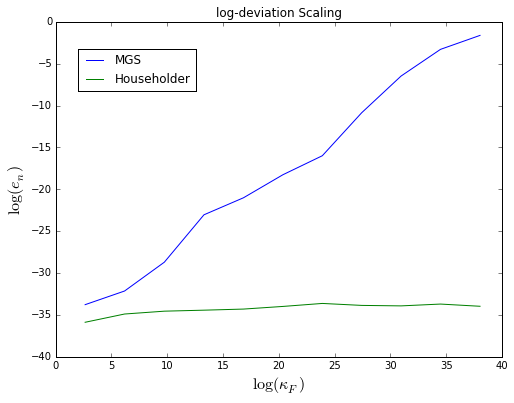

In [19]:
plt.figure(figsize = (8,6))
mgs_plot = plt.plot(lkf_vals,mgsy, label ='MGS')
house_plot = plt.plot(lkf_vals,housey, label='Householder')
plt.title('log-deviation Scaling')
plt.xlabel('$\log (\kappa_F)$', fontsize=16)
plt.ylabel('$\log (e_n)$', fontsize=16)
plt.legend(loc=(0.05,0.795))
plt.show()

The above plot shows the marked contrast in how $\log e_n$ scales with respect to $\log \kappa_F\left(L_n\right)$ for each algorithm. For MGS, represented by the blue curve, $\log e_n$ increases much faster with respect to $\log \kappa_F\left(L_n\right)$ than does Householder's $\log e_n$, represented by the green curve. Thus, it seems evident that the Householder algorithm is more stable than MGS.

***Slope estimation by calculating the average rate of change:*** 

$$\frac{\log e_{12} - \log e_1}{\log \kappa_F\left(L_{12}\right) - \log \kappa_F\left(L_1\right)}$$

In [20]:
s1 = (mgsy[-1] - mgsy[0])/(lkf_vals[-1] - lkf_vals[0])
s2 = (housey[-1] - housey[0])/(lkf_vals[-1] - lkf_vals[0])
print '\n'
print '*************************************************'
print '* MGS\'s slope estimate:         {}  *'.format(s1)
print '* Householder\'s slope estimate: {} *'.format(s2)
print '*************************************************'



*************************************************
* MGS's slope estimate:         0.909171170397  *
* Householder's slope estimate: 0.0540183619009 *
*************************************************


This indicates that the MGS's $\log e_n$ scales approximately linearly with respect to $\log \kappa_F\left(L_n\right)$, whereas in the case of Householder's, the scaling of $\log e_n$ with respect to $\log \kappa_F\left(L_n\right)$ is much, much slower with an average rate of chage of approximately $0.05$.

## Problem 2

1. If $x$ and $y$ are column vectors with $m$ components, $x^T y$, by definition, costs $m$ multiplications and $m-1$ additions of the resulting multiplications, i.e. $x_1 y_1 + x_2 y_2 + ... + x_m y_m$, for a total of $2m-1$ flops.

2. If $x$ and $y$ are column vectors with $m$ components, $x-y$ costs $m$ subtractions, i.e $\left(x_1-y_1, x_2-y_2,...,x_m-y_m\right)^T$.

3. If $a$ is a scalar and $x$ a colum vector with $m$ components, $ax$ costs $m$ multiplications, i.e. $\left(ax_1,ax_2,...,ax_m\right)^T$.

4. If $A$ is a $m\times n$ matrix, denote $a_i$ the $ith$ row of $A$ with $n$ components. Additionally, let $x$ be a column vector with $n$ components. The operation $Ax$ is the same as calculating $a^T_i x$ times the number of rows ($m$) in $A$, which results in a vector $b$ with $m$ components. Hence the operations produces $m\left(2n-1\right) = 2mn-m$ flops.

5. For the operation $x-2\left(x^T v\right)v$, we can break it down as follows:
    
    * $x^T v$ costs $2m-1$ flops.
    
    * $2\left(x^T v\right)$ is a scalar times a scalar and costs 1 flop.
    
    * $2\left(x^T v\right)v$ is a scalar times a vector and costs $m$ flops.
    
    * $x - 2\left(x^T v\right)v$ is a vector minus a vector and costs $m$ flops.
    
   Hence the whole operation costs $2m-1 + 1 + m + m = 4m$ flops.

## Problem 3

***Create a function to generate the required matrix:***

In [21]:
def xmatrix(n):
    X = numpy.identity(n)
    for i in xrange(n):
        for j in xrange(n):
            if i == j:
                X[n-1-i,j] = 1
            if (i == j) and (i in xrange(n-1)):
                X[i,j+1] = 1
    return X

In [22]:
S = xmatrix(10)
S

array([[ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

The function below implements the Householder algorithm and shows each iterate $A_k$. The pattern observed is as follows:

* At $k=1$ one new non-zero is introduced at $a_{10,2}$
* At $k=2$ two new non-zeroes are introduced at $a_{9:10,3}$, one at $a_{10,9}$,and one at $a_{10,10}$
* At $k=3$ three new non-zeroes are introduced at $a_{8:10,4}$, two at $a_{9:10,8}$, and one at $a_{8,10}$
* At $k=4$ four new at $a_{7:10,5}$, three at $a_{8:10,7}$, and two at $a_{7,9:10}$
* At $k=5$ four new at $a_{7:10,6}$ and three at $a_{8:10}$

After 5 iterations all entries are replaced with non-zeroes in the lower right $5$ by $5$ block of $A_{k+1}$

In [23]:
q3 = thin_house(S, show_spill=1)

matrix block (9, 9): 

          0    1    2    3    4    5    6    7             8
0  1.000000  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.000000e+00
1  0.000000  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.000000e+00
2  0.000000  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.000000e+00
3  0.000000  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.000000e+00
4  0.000000  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.000000e+00
5  0.000000  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.000000e+00
6  0.000000  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.000000e+00
7  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.000000e+00
8 -0.707107  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.110223e-16 

matrix block (8, 8): 

          0    1    2    3    4    5         6         7
0  1.000000  1.0  0.0  0.0  0.0  1.0  0.000000  0.000000
1  0.000000  1.0  1.0  0.0  1.0  0.0  0.000000  0.000000
2  0.000000  0.0  1.0  1.0  0.0  0.0  0.000000  0.000000
3  0.000000  0.0  1.0  1.0  1.0  0.0  0.000000  0.000000
4  0.000000  1.0  0.0  0.0  1.0  1.0  0.000000  0.000000
